# Week 4 Summary
> NAME: $\color{red}{\text{    Phu Dang     }}$
> 
> PID: $\color{red}{\text{    A16913100     }}$
>
> 
---

I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

## Key Takeaways from Week 4


#### Monday: 

Hypothesis testing types and construction for one sample proportion and one sample mean.

- Review of hypothesis testing
- One sample proportion
- One sample mean


#### Wednesday

Continue from Monday with code demonstrations of the hypothesis tests prepared on Monday.

- P-value interpretations
- stats.ttest_1samp


#### Friday: 

Covered the categorical and multinomial distributions, with code demonstration for a chi-squared goodness of fit test among categories in a dataset.

- Goodness of fit test
- Test for independence
- Test for homogeneity


---

%%latex
\newpage

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Monday, Jan 29th

Monday was a review of hypothesis testing from the previous week, followed with coverage of hypothesis tests for one sample mean and one sample proportion. Specific focus was one constructing the hypothesis tests and choosing the suitable choices for each component of the tests (e.g. population param, test statistic, null/alt hypotheses, etc.)

Key concepts covered:

- Univariate Hypothesis Testing
    - One sample proportion
    - Two sample proportions
    - One sample mean
    - Two sample means
    
**Notes**: 

Motivation for hypothesis tests: (Broadly) We want to examine whether the true population parameter, $\theta$, is equal to some value $\theta_0$

- Assumptions: the distribution from which the data points follow, use this information to determine the **population parameter**
- Hypothesis Test Components:
    - Null Hypothesis:
        - $H_0$ is a statement about the value of $\theta$ under the most conservative claims.
    - Alternative Hypothesis:
        - $H_a$ is a statement about the value of $\theta$ we are seeking statistical evidence/significance for. 
    - Sample statistic
        - The sample statistic, $\hat\theta$, is a function of the data we use to estimate $\theta$.
    - Test statistic
        - $\hat T$ = $\hat T(X_1, X_2,...,X_n)$ is a function of the data used to decide between $H_0$ and $H_1$.
        - The sampling distribution of the test statistic does not depend on $\theta$.
    - Rejection region
        - Level $\alpha$ rejection region, the set of values of the observed test statistic for which we reject the null in favor of the alternate.
     
  
- Types of Errors
    - Type I Error: Reject the null while it is true
    - Type II Error: Fail to reject the null while the alternate hypothesis is true
    
    
- Significance level
    - $\alpha$ is the probability of making a Type I Error

$$
\alpha = P(\text{reject } H_0 | H_0 \text{ is true})
$$


#### One sample mean HT Construction

Are cars driven by UCSD students fuel efficient? Assuming an efficiency threshold of 21 mpg. Sampled 100 students, observed average fuel efficiency is 20.2 mpg.

Hypothesis Test Structure:
- Assumption: $ X_1, X_2, \dots, X_{100} \sim N(\mu, \sigma^2) $

- Population param: $\theta = \mu$

- Sample statistic: $\hat\theta = \overline X$

- Test statistics: $T = \frac{\hat\theta-\theta}{\hat\sigma/\sqrt{n}} \sim t(n-1)$

- Null Hypothesis: $H_0: \theta = 21$ or $H_0: \theta > 21$

- Alternative Hypothesis: $H_a: \theta < 21$

- Rejection region shape: $(-\infty, x_\alpha)$ 



#### One sample proportion HT Construction

Is the number of students who prefer to study in Geisel Library different from the number of students who prefer to study at WongAvery Library? Sampled 100 students, 80 preferred Geisel and 20 preferred WongAvery.

We want to see if this is evidence to say that the proportion of students who prefer Geisel is more than the number of students who prefer WongAvery.

Hypothesis Test Structure:

- Assumption: $ X_1, \dots, X_n \sim Ber(p) $

- Population param: $ \theta $

- Sample statistic: $ \hat\theta = \overline X $

- Test statistics: $ T = \displaystyle \frac{\hat\theta-\theta}{\sqrt{\frac{\hat\theta(1-\hat\theta)}{n}}} $

- Null Hypothesis: $ H_0: \theta = 0.5 $

- Alternative Hypothesis: $ H_a: \theta \neq 0.5 $

- Rejection region shape: $ (-\infty, -x_{\alpha/2}) \cup (x_{\alpha/2}, \infty) $

---

%%latex 
\newpage

## Wed, Jan 31st

Review of one sample mean and one sample proportion hypothesis tests from Monday with code demonstration of the tests. Showed how the test is done both manually and using the scipy.stats api.

Key concepts covered: 

- Univariate Hypothesis Testing
    - Two sample proportions 
    - Code demonstration of one sample proportion HT (from Monday)

#### Two sample proportions HT Construction

Is the proportion of data science students enrolled in MATH 189 different from the proportion of mathematics students enrolled in MATH 189? Randomly sampled 50 data science students and 50 math students, found out that 20 dsc students are enrolled and 25 math students are enrolled. 

We want to see if this is evidence that the proportion of math students who are enrolled in MATH 189 is different from the proportion of dsc students who are enrolled. 

Assumption: $X_1, \dots, X_n \sim Ber(p_X) \text{ and } Y_1, \dots, Y_n \sim Ber(p_Y)$

Population param: $\theta = p_X - p_Y$

Sample statistics: $\hat\theta = \overline X - \overline Y$

Test statistics: $T = \frac{\hat\theta-\theta}{SE} \approx N(0,1)$

Null Hypothesis: $ H_0 : \theta = 0 $

Alternative Hypothesis: $ H_\alpha : \theta \neq 0 $

Rejection region shape: $ (-\infty, -x_{\alpha}) \cup (x_{\alpha}, \infty) $

**Extra Notes**:

- Standard error for two sample proportions

$$
SE = \sqrt{\frac{\hat\theta_X \times (1-\hat\theta_X)}{n} + \frac{\hat\theta_Y \times (1-\hat\theta_Y)}{m}}
$$

- Rejection region shape depends on the direction of our question. E.g. "different" often means two directions (two tails) (one population can be more or less than the other, meaning no particular direction specified), versus "one population more or less than the other" has a one-sided rejection region.

- **P-value interpretation**: the smallest alpha where we can reject the null hypothesis for the observed test statistics

- **stats.ttest_1samp** can be used for one sample mean HT

#### One sample mean HT demo

In [6]:
muTrue = 20.2
mu0 = 21

def simulateMPG(n):
    return np.random.normal(muTrue, 1, size=n)

In [7]:
# Generate surveys

mpgData = simulateMPG(31)
mpgData

array([20.15391811, 20.99370345, 18.89886548, 20.15277512, 21.40036934,
       20.73562851, 21.73240277, 21.50811739, 17.93102821, 21.375922  ,
       18.85940823, 18.22500049, 18.98123211, 17.88569199, 21.70065397,
       20.45322948, 20.35290157, 19.67177703, 20.69878226, 21.12806824,
       19.0505609 , 20.30565778, 18.92305929, 19.58630251, 20.72822706,
       20.41706087, 21.44581482, 18.75098085, 19.91896419, 19.18852413,
       21.33971507])

In [8]:
thetaHat = mpgData.mean()
thetaHat

20.08046268423384

In [27]:
tHat = (mpgData.mean() - mu0) / (mpgData.std(ddof=1) / np.sqrt(31))
tHat

-4.423421782557434

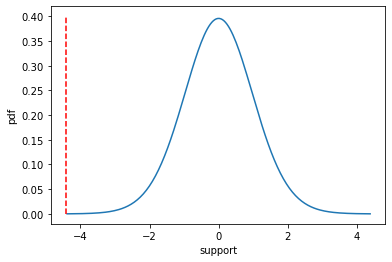

In [28]:
# Plot t distribution and observed test statistic (tHat)

minX, maxX = stats.t(30).ppf((1e-3, 1-1e-3))
suppX = np.linspace(minX-1, maxX+1, 200)
plt.plot(suppX, stats.t(30).pdf(suppX))
plt.vlines(tHat, 0, 0.4, color='red', linestyles='--')
plt.xlabel("support")
plt.ylabel("pdf");

In [29]:
# Get rejection region and p-value

pVal = stats.t(30).cdf(tHat)
pVal

5.8975515097677657e-05

--> Reject the null hypothesis

In [30]:
# stats.ttest_1samp demo

stats.ttest_1samp(mpgData, mu0, alternative='less')

Ttest_1sampResult(statistic=-4.423421782557434, pvalue=5.8975515097677657e-05)

%%latex 
\newpage

## Fri, Feb 2nd

Review the anatomy of hypothesis tests with code demonstrations, and additional parametric hypothesis tests, including goodness of fit test, test for independence, and test for homogeneity.

Key concepts covered:

- Code demonstrations of one sample proportion and two sample proportions hypothesis tests
- Goodness of fit test

    - Used to see if the observed frequencies of categories of a categorical variable are consistent with some expected frequencies.
    
    - **Categorical distribution**:
        - A RV $X \sim Categorical(\pi)$ has a categorical distribution with parameters $\pi$ = $(p_1, \dots, p_n)$ if:
        
$$
P(X = i) = p_i \text{ for } i = 1, 2, \dots, k
$$

with the following conditions:

$$
0 \leq p_i \leq 1 \text{ for } i = 1, 2, \dots, k
$$

$$
\sum_{i=1}^{k}p_i = 1
$$

**Multinomial distribution**:
- A random vector $X = (X_1, \dots, X_k)$ has a multinomial distribution with params n and $\pi = (p_1, \dots, p_k)$, is $X \sim Multinomial(n, \pi) \text{ if:}$

$$
P(X_1 = O_1, X_2 = 0_2, \dots, X_k = O_k) = \frac{n!}{O_1! \times O_2! \times \dots \times O_k!} \times p_{1}^{O_1} \times p_{2}^{O_2} \times \dots \times p_{k}^{O_k}
$$

where the total number of observations is n = $O_1 + O_2 + \dots + O_k$.

- Test for independence
- Test for homogeneity

**Extra Notes**:

- P-value can also be understood as the minimum probability for a Type I Error we would accept to reject the null hypothesis.

- "What the multinomial distribution is to a categorical variable is the same as what a binomial distribution is to a bernoulli distribution" -SV

- When n = 1, the multinomial distribution becomes the categorical distribution

- The multinomial distribution is a generalization of the binomial distribution to more than two categories.
    - When k = 2 and $\pi = (p, 1-p)$, the categorical distribtution is exactly the Bernoulli distribution.
    - For k = 2 and n > 1, the PMF of the multinomial distribution is the same as the PMF of the binomial distribution.
 
 
- The test statistics of observed frequencies consistency with expected frequencies follow the chi-squared distribution with dof k-1, where k is the number of categories.

In [32]:
# Import covid-19 dataset

url = 'https://vincentarelbundock.github.io/Rdatasets/csv/medicaldata/covid_testing.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,subject_id,fake_first_name,fake_last_name,gender,pan_day,test_id,clinic_name,result,demo_group,age,drive_thru_ind,ct_result,orderset,payor_group,patient_class,col_rec_tat,rec_ver_tat
rownames,,,,,,,,,,,,,,,,,
1,1412,jhezane,westerling,female,4,covid,inpatient ward a,negative,patient,0.0,0,45.0,0,government,inpatient,1.4,5.2
2,533,penny,targaryen,female,7,covid,clinical lab,negative,patient,0.0,1,45.0,0,commercial,not applicable,2.3,5.8
3,9134,grunt,rivers,male,7,covid,clinical lab,negative,patient,0.8,1,45.0,1,NaN,NaN,7.3,4.7
4,8518,melisandre,swyft,female,8,covid,clinical lab,negative,patient,0.8,1,45.0,1,NaN,NaN,5.8,5.0
5,8967,rolley,karstark,male,8,covid,emergency dept,negative,patient,0.8,0,45.0,1,government,emergency,1.2,6.4


#### One sample proportion 

In [37]:
# Do the number of positive COVID-19 tests exceed 7%?

stats.ttest_1samp(
    df['result'].map(lambda x: x == 'positive'),
    0.07,
    alternative='greater'
)

Ttest_1sampResult(statistic=-7.756291371840876, pvalue=0.9999999999999953)

--> We fail to reject the null hypothesis and conclude that there is not enough evidence that the number of positive COVID-19 tests exceed 7%.

#### Two sample proportions 

In [43]:
# Do drive-thru tests have a higher proportion of positive COVID-19 tests than walk-in tests?

pd.crosstab(df[df['result'] != 'invalid']['drive_thru_ind'], df['result'], normalize=True)

result,negative,positive
drive_thru_ind,,
0,0.457728,0.025356
1,0.485450,0.031466


In [52]:
# Exclude tests with "invalid" as result

df = df[df['result'] != 'invalid']

In [53]:
stats.ttest_ind(
    df[df['drive_thru_ind'] == 1]['result'].map(lambda x: x == 'positive'),
    df[df['drive_thru_ind'] == 0]['result'].map(lambda x: x == 'positive'),
    equal_var=False,
    alternative='greater'
)

Ttest_indResult(statistic=2.238193444580982, pvalue=0.012611422243054001)

--> At a 1% significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence that drive-thru tests have a higher proportion of positive results than walk-in tests.

#### Get pmf of multinomial distribution

In [59]:
X = stats.multinomial(10, [0.1, 0.3, 0.6]) # 10 observations
X.pmf([1, 3, 6])

0.10581580799999993

In [60]:
# Generate rvs

X.rvs(5)

array([[0, 4, 6],
       [2, 4, 4],
       [2, 4, 4],
       [1, 3, 6],
       [2, 1, 7]])

#### Goodness of fit test

In [61]:
# Import a political dataset

url = 'https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Political.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,Year,Sex,Vote,Paper,Edit,TV,Ethics,Inform,Participate
rownames,,,,,,,,,
1,1,1,1,3,1,0,2,2,0.0
2,4,1,3,1,1,3,2,2,1.0
3,2,0,3,4,1,3,2,3,1.0
4,3,1,3,3,1,0,3,2,1.0
5,1,1,3,2,0,0,2,3,1.0


Ethics column ranges from 1 (ultra liberal) to 5 (ultra conservative)

In [63]:
# Are the ethical beliefs of college students uniformly representatie, or are they skewed towards one particular belief?

df['Ethics'].value_counts()

2    26
3    19
4    11
5     3
Name: Ethics, dtype: int64

#### Chi-squared goodness of fit test

In [65]:
n = df.shape[0]
k = df['Ethics'].nunique()

pHat = df['Ethics'].value_counts() / n
p = np.repeat(1/4, 4)

In [66]:
tHat = n * np.sum([(x[0] - x[1])**2 / x[1] for x in zip(pHat, p)])
tHat

20.11864406779661

In [68]:
T = stats.chi2(k-1)
pVal = 1 - T.cdf(tHat)
pVal

0.00016039817465407502

In [70]:
# Redo using stats.chisquare

stats.chisquare(df['Ethics'].value_counts())

Power_divergenceResult(statistic=20.11864406779661, pvalue=0.0001603981746541034)